In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# The $\sin^{2}{\Theta}$ term

In [2]:
from sympy import *
init_printing()
theta, psi, chi = symbols('theta psi chi')

cosTheta = sin(theta) * sin(psi) * sin(chi) + cos(theta)*cos(chi)
sin2Theta = 1 -cosTheta**2
sin2Theta

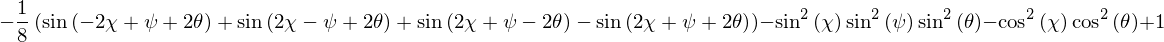

In [3]:
sin2Theta.expand().trigsimp()

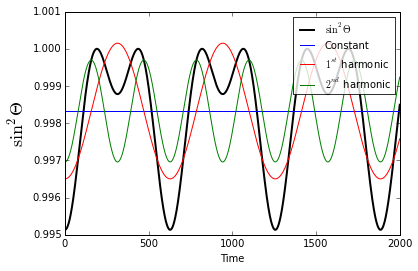

In [6]:
def Sin2ThetaF(theta, chi, psi):
    cosTheta = np.sin(theta)*np.sin(psi)*np.sin(chi) + np.cos(theta)*np.cos(chi)
    return 1 - cosTheta**2

time = np.linspace(0, 2e3, 1000)
psidot = 1e-3 * 10
k = 1

theta = np.radians(3)
chi =  np.radians(89)
psi = psidot * time + np.pi/2

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(time, k*Sin2ThetaF(theta, chi, psi), color="k", lw=2, label="$\sin^{2}\Theta$")

CONST = np.zeros(len(time)) + k*(1 - np.cos(theta)**2 * np.cos(chi)**2 
                                 - .5 * (np.sin(theta)*np.sin(chi))**2)
ax.plot(time, CONST, color="b", label="Constant")

FIRST = -0.5 * k * np.sin(2*theta) * np.sin(2*chi) * np.sin(psi)
ax.plot(time, CONST + FIRST, color="r", label=r"$1^{st}$ harmonic")


SECOND = 0.5 * k * (np.sin(theta) * sin(chi))**2 * np.cos(2 * psi)
ax.plot(time, CONST + SECOND, color="green", label=r"$2^{nd}$ harmonic")

ax.legend(fontsize=10, framealpha=0.8)
#plt.plot(time, CONST + SECOND + FIRST)

ax.set_xlabel("Time")
ax.set_ylabel("$\sin^{2}\Theta$", size=18)

plt.savefig("img/Sin2Theta.pdf")


## The $sin^{2}\Theta$ as a Generic function


$$ f(x) = a + b\sin(x) $$

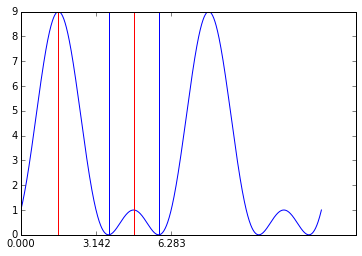

In [32]:
def f(x, a=1, b=1):
    return a + b*np.sin(x)

a = 1.
b = 2.
x = np.linspace(0, 4*np.pi, 1000)
plt.plot(x, f(x, a, b)**2)
plt.xticks([0, np.pi, 2*np.pi])

plt.axvline(np.pi - np.arcsin(-a/b))
plt.axvline(2*np.pi + np.arcsin(-a/b))
plt.axvline(np.pi/2.0, color="r")
plt.axvline(np.pi + np.pi/2.0, color="r")

## The $\frac{df}{d\psi}$ term in expanded form

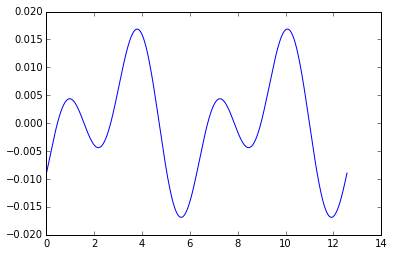

In [34]:
def dfdpsi(theta, chi, psi):
    return (theta * np.cos(chi)/np.sin(chi) * np.cos(psi) + 
            theta**2 * .5*(3+np.cos(2*chi))/np.sin(chi) * np.sin(2*psi))

psi = np.linspace(0, 4*np.pi, 1000)
theta = 0.1
chi = 1.66

plt.plot(psi, dfdpsi(theta, chi, psi))
#plt.plot(psi, theta * np.cos(chi)/np.sin(chi) * np.cos(psi))
#plt.plot(psi, theta**2 * .5*(3+np.cos(2*chi))/np.sin(chi) * np.sin(2*psi))
plt.show()

## The $\frac{df}{d\psi}$ term as a generic function

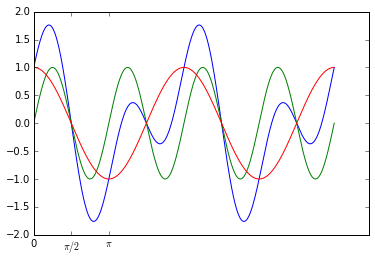

In [58]:
def g(x, A, B):
    return A*np.cos(x) + B * np.sin(2*x)

A = 1
B = 1
x = np.linspace(0, 4*np.pi, 1000)

ax = plt.subplot(111)
ax.plot(x, g(x, A, B))
ax.plot(x, g(x, 0, B))
ax.plot(x, g(x, A, 0))

ax.set_xticks([0, .5*np.pi, np.pi])
ax.set_xticklabels(["0", "$\pi/2$", "$\pi$"])

plt.show()

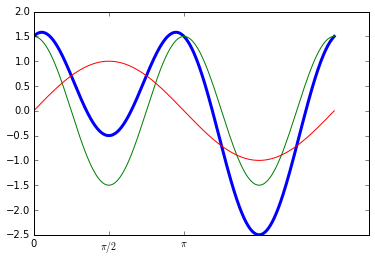

In [57]:
def g(x, A, B):
    return A*np.sin(x) + B * np.cos(2*x)

A = 1
B = 1.5
x = np.linspace(0, 2*np.pi, 1000)

ax = plt.subplot(111)
ax.plot(x, g(x, A, B), lw=3)
ax.plot(x, g(x, 0, B))
ax.plot(x, g(x, A, 0))

ax.set_xticks([0, .5*np.pi, np.pi])
ax.set_xticklabels(["0", "$\pi/2$", "$\pi$"])
plt.show()